<a href="https://colab.research.google.com/github/Mario-16180/BEDU-M4-DataAnalysisProject-CarAccidents/blob/main/BEDU_DataAnalysis_CarAccidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de librerías

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from statsmodels.graphics.mosaicplot import mosaic

# Lectura del archivo ya procesado

In [3]:
df = pd.read_csv("data\incidentes-viales-c5-limpio.zip", sep="$", index_col=0)

In [4]:
df.head()

,folio,codigo_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,mes,fecha_hora_cierre,fecha_hora_creacion
2,C5/170622/03715,(N) La unidad de atención a emergencias fue de...,VENUSTIANO CARRANZA,accidente-choque sin lesionados,19.43053,-99.05260,EMERGENCIA,LLAMADA DEL 911,VENUSTIANO CARRANZA,6,2017-06-22 16:48:07,2017-06-22 13:44:52
5,C5/170621/07339,(A) La unidad de atención a emergencias fue de...,IZTAPALAPA,accidente-choque sin lesionados,19.38676,-99.03350,EMERGENCIA,LLAMADA DEL 911,IZTAPALAPA,6,2017-06-22 03:53:51,2017-06-21 23:29:01
8,C5/170622/01694,(N) La unidad de atención a emergencias fue de...,IZTAPALAPA,accidente-choque sin lesionados,19.35017,-99.07324,EMERGENCIA,LLAMADA DEL 911,IZTAPALAPA,6,2017-06-22 10:47:19,2017-06-22 08:51:30
9,C5/170622/03779,(N) La unidad de atención a emergencias fue de...,CUAJIMALPA,accidente-choque sin lesionados,19.37273,-99.27753,EMERGENCIA,LLAMADA DEL 911,CUAJIMALPA,6,2017-06-22 14:17:46,2017-06-22 13:49:44
12,C5/170622/04693,(N) La unidad de atención a emergencias fue de...,MIGUEL HIDALGO,accidente-choque sin lesionados,19.45316,-99.19868,EMERGENCIA,LLAMADA DEL 911,MIGUEL HIDALGO,6,2017-06-22 16:47:41,2017-06-22 15:48:39


# Test de chi cuadrada
## Análisis de dependencia entre la variable delegación con el tipo de incidente y clasificación de alarma

### Delegación vs tipo de incidente

##### Lectura y generación de la tabla de contingencia

In [48]:
cross_tab = df.groupby(["delegacion_inicio","incidente_c4"]).agg("count")["folio"].unstack(1).fillna(0).astype("int")
new_cols = []
for i in range(len(cross_tab.columns)):
    new_cols.append(f'type_{i}')
cross_tab.columns = new_cols
cross_tab.reset_index(inplace=True,drop=True)

<b>Mapeo del nombre de las delegaciones y tipos de incidentes</b>

['accidente-choque con lesionados', 'accidente-choque con prensados',
       'accidente-choque sin lesionados', 'accidente-ciclista',
       'accidente-ferroviario', 'accidente-monopatín',
       'accidente-motociclista', 'accidente-otros',
       'accidente-persona atrapada / desbarrancada',
       'accidente-vehiculo atrapado', 'accidente-vehiculo desbarrancado',
       'accidente-vehículo atrapado-varado', 'accidente-volcadura',
       'cadáver-accidente automovilístico', 'cadáver-atropellado',
       'detención ciudadana-accidente automovilístico',
       'detención ciudadana-atropellado', 'lesionado-atropellado',
       'mi ciudad-calle-incidente de tránsito', 'sismo-choque con lesionados',
       'sismo-choque con prensados', 'sismo-choque sin lesionados',
       'sismo-persona atropellada'] -> type_0, type_1, type_2, ..., type_22
       
['ALVARO OBREGON', 'AZCAPOTZALCO', 'BENITO JUAREZ', 'COYOACAN',
       'CUAJIMALPA', 'CUAUHTEMOC', 'GUSTAVO A. MADERO', 'IZTACALCO',
       'IZTAPALAPA', 'MAGDALENA CONTRERAS', 'MIGUEL HIDALGO', 'MILPA ALTA',
       'TLAHUAC', 'TLALPAN', 'VENUSTIANO CARRANZA', 'XOCHIMILCO'] -> 0, 1, 2, ..., 15

##### Test de chi cuadrada

In [49]:
chi_2, p, dof, expected = chi2_contingency(cross_tab)
print('Grados de libertad = %d' % dof, '\n')

# Usando el estadístico de chi cuadrada
prob = 0.90
critical = chi2.ppf(prob, dof)
print("Usando el valor estadístico de chi cuadrada:")
print('Probabilidad = %.3f, Valor Crítico = %.3f, Chi-Cuadrada = %.3f' % (prob, critical, chi_2))
if abs(chi_2) >= critical:
    print('Ambas variables son dependientes (rechazamos la hipótesis nula)', '\n')
else:
    print('Ambas variables son independientes (no rechazamos la hipótesis nula)', '\n')
    
# Usando el p-value
alpha = 1.0 - prob
print("Usando el valor p:")
print('Significancia = %.3f, valor p = %.3f' % (alpha, p))
if p <= alpha:
    print('Ambas variables son dependientes (rechazamos la hipótesis nula)')
else:
    print('Ambas variables son independientes (no rechazamos la hipótesis nula)')

Grados de libertad = 330 

Usando el valor estadístico de chi cuadrada:
Probabilidad = 0.900, Valor Crítico = 363.322, Chi-Cuadrada = 8715.463
Ambas variables son dependientes (rechazamos la hipótesis nula) 

Usando el valor p:
Significancia = 0.100, valor p = 0.000
Ambas variables son dependientes (rechazamos la hipótesis nula)


In [51]:
# Valores esperados
pd.DataFrame(expected)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,5351.918013,34.212971,16902.914704,38.888497,1.335864,1.187435,1609.419725,50.762847,168.764201,61.672406,...,30.131163,43.192948,2.745943,9.722124,2689.911368,0.890576,6.159819,0.074215,18.998960,0.222644
1,2935.294449,18.764328,9270.514155,21.328650,0.732664,0.651256,882.696778,27.841215,92.559830,33.824634,...,16.525634,23.689455,1.506031,5.332163,1475.299488,0.488442,3.378393,0.040704,10.420104,0.122111
2,5453.269741,34.860878,17223.012958,39.624946,1.361162,1.209922,1639.898045,51.724166,171.960166,62.840324,...,30.701771,44.010913,2.797945,9.906236,2740.851454,0.907442,6.276470,0.075620,19.358752,0.226860
3,5883.086991,37.608552,18580.500926,42.748115,1.468447,1.305286,1769.151961,55.800975,185.513767,67.793290,...,33.121631,47.479777,3.018474,10.687029,2956.880606,0.978964,6.771171,0.081580,20.884575,0.244741
4,1577.689033,10.085623,4982.801135,11.463919,0.393799,0.350043,474.439975,14.964352,49.749908,18.180375,...,8.882349,12.732826,0.809475,2.865980,792.957525,0.262532,1.815850,0.021878,5.600693,0.065633
5,7343.411114,46.943902,23192.629517,53.359229,1.832951,1.629289,2208.298159,69.652123,231.562760,84.621220,...,41.343219,59.265403,3.767732,13.339807,3690.849708,1.221967,8.451939,0.101831,26.068631,0.305492
6,7396.137446,47.280963,23359.154620,53.742353,1.846111,1.640988,2224.153932,70.152231,233.225401,85.228807,...,41.640067,59.690934,3.794784,13.435588,3717.350330,1.230741,8.512625,0.102562,26.255806,0.307685
7,2998.370765,19.167553,9469.727518,21.786980,0.748408,0.665251,901.664981,28.439493,94.548841,34.551489,...,16.880752,24.198516,1.538394,5.446745,1507.002085,0.498938,3.450991,0.041578,10.644021,0.124735
8,11135.996669,71.188597,35170.718493,80.917190,2.779598,2.470754,3348.798067,105.624729,351.155898,128.324781,...,62.695380,89.873673,5.713618,20.229298,5597.029693,1.853065,12.817036,0.154422,39.532062,0.463266
9,1169.352881,7.475271,3693.156727,8.496837,0.291876,0.259445,351.645819,11.091291,36.873679,13.474946,...,6.583427,9.437327,0.599968,2.124209,587.724924,0.194584,1.345873,0.016215,4.151127,0.048646


### Delegación vs clasificación de alarma

##### Lectura y generación de la tabla de contingencia

In [52]:
cross_tab = df.groupby(["delegacion_inicio","clas_con_f_alarma"]).agg("count")["folio"].unstack(1).fillna(0).astype("int")
new_cols = []
for i in range(len(cross_tab.columns)):
    new_cols.append(f'type_{i}')
cross_tab.columns = new_cols
cross_tab.reset_index(inplace=True,drop=True)

<b>Mapeo del nombre de las delegaciones y tipos de incidentes</b>

['accidente-choque con lesionados', 'accidente-choque con prensados',
       'accidente-choque sin lesionados', 'accidente-ciclista',
       'accidente-ferroviario', 'accidente-monopatín',
       'accidente-motociclista', 'accidente-otros',
       'accidente-persona atrapada / desbarrancada',
       'accidente-vehiculo atrapado', 'accidente-vehiculo desbarrancado',
       'accidente-vehículo atrapado-varado', 'accidente-volcadura',
       'cadáver-accidente automovilístico', 'cadáver-atropellado',
       'detención ciudadana-accidente automovilístico',
       'detención ciudadana-atropellado', 'lesionado-atropellado',
       'mi ciudad-calle-incidente de tránsito', 'sismo-choque con lesionados',
       'sismo-choque con prensados', 'sismo-choque sin lesionados',
       'sismo-persona atropellada'] -> type_0, type_1, type_2, ..., type_22
       
['ALVARO OBREGON', 'AZCAPOTZALCO', 'BENITO JUAREZ', 'COYOACAN',
       'CUAJIMALPA', 'CUAUHTEMOC', 'GUSTAVO A. MADERO', 'IZTACALCO',
       'IZTAPALAPA', 'MAGDALENA CONTRERAS', 'MIGUEL HIDALGO', 'MILPA ALTA',
       'TLAHUAC', 'TLALPAN', 'VENUSTIANO CARRANZA', 'XOCHIMILCO'] -> 0, 1, 2, ..., 15

##### Test de chi cuadrada

In [53]:
chi_2, p, dof, expected = chi2_contingency(cross_tab)
print('Grados de libertad = %d' % dof, '\n')

# Usando el estadístico de chi cuadrada
prob = 0.90
critical = chi2.ppf(prob, dof)
print("Usando el valor estadístico de chi cuadrada:")
print('Probabilidad = %.3f, Valor Crítico = %.3f, Chi-Cuadrada = %.3f' % (prob, critical, chi_2))
if abs(chi_2) >= critical:
    print('Ambas variables son dependientes (rechazamos la hipótesis nula)', '\n')
else:
    print('Ambas variables son independientes (no rechazamos la hipótesis nula)', '\n')
    
# Usando el p-value
alpha = 1.0 - prob
print("Usando el valor p:")
print('Significancia = %.3f, valor p = %.3f' % (alpha, p))
if p <= alpha:
    print('Ambas variables son dependientes (rechazamos la hipótesis nula)')
else:
    print('Ambas variables son independientes (no rechazamos la hipótesis nula)')

Grados de libertad = 45 

Usando el valor estadístico de chi cuadrada:
Probabilidad = 0.900, Valor Crítico = 57.505, Chi-Cuadrada = 3568.439
Ambas variables son dependientes (rechazamos la hipótesis nula) 

Usando el valor p:
Significancia = 0.100, valor p = 0.000
Ambas variables son dependientes (rechazamos la hipótesis nula)


In [54]:
# Valores esperados
pd.DataFrame(expected)

,0,1,2,3
0,12.171209,17373.361612,390.146615,9630.320564
1,6.675379,9528.533839,213.978463,5281.812319
2,12.401701,17702.368934,397.535001,9812.694365
3,13.379181,19097.638908,428.868019,10586.113892
4,3.587944,5121.483925,115.011111,2838.917020
5,16.700217,23838.133622,535.323408,13213.842753
6,16.820126,24009.293501,539.167076,13308.719297
7,6.818826,9733.291768,218.576630,5395.312776
8,25.325227,36149.600303,811.797078,20038.277391
9,2.659315,3795.945754,85.244032,2104.150899


<Figure size 3600x3600 with 0 Axes>

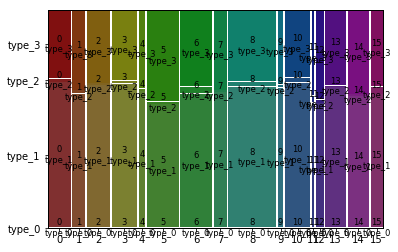

In [47]:
fig = plt.figure(figsize=(50,50))
mosaic(cross_tab.stack());